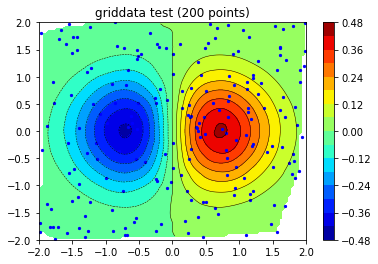

In [20]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
# make up some randomly distributed data
seed(1234)
npts = 200
x = uniform(-2,2,npts)
y = uniform(-2,2,npts)
z = x*np.exp(-x**2-y**2)
# define grid.
xi = np.linspace(-2.1,2.1,100)
yi = np.linspace(-2.1,2.1,100)
# grid the data.
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
# contour the gridded data, plotting dots at the randomly spaced data points.
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar() # draw colorbar
# plot data points.
plt.scatter(x,y,marker='o',c='b',s=5)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('griddata test (%d points)' % npts)
plt.show()

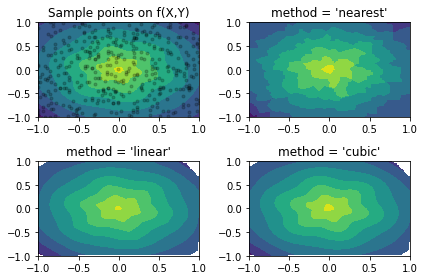

In [19]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

x = np.linspace(-1,1,100)
y =  np.linspace(-1,1,100)
X, Y = np.meshgrid(x,y)

def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s*(1-s)/5 * np.sin(6*phi) 
    return 5*(1-tau) + tau

T = f(X, Y)
# Choose npts random point from the discrete domain of our model function
npts = 400
px, py = np.random.choice(x, npts), np.random.choice(y, npts)

fig, ax = plt.subplots(nrows=2, ncols=2)
# Plot the model function and the randomly selected sample points
ax[0,0].contourf(X, Y, T)
ax[0,0].scatter(px, py, c='k', alpha=0.2, marker='.')
ax[0,0].set_title('Sample points on f(X,Y)')

# Interpolate using three different methods and plot
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px, py), f(px,py), (X, Y), method=method)
    r, c = (i+1) // 2, (i+1) % 2
    ax[r,c].contourf(X, Y, Ti)
    ax[r,c].set_title("method = '{}'".format(method))

plt.tight_layout()
plt.show()

In [ ]:
# # === TODO: matplotlib natgrid ?
# # === TODO: radial basis function 

### References:

## docs
* [docs for all scipy interpolate functions](https://docs.scipy.org/doc/scipy/reference/interpolate.html)
* [scipy.interpolate.griddata docs](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.interpolate.griddata.html#scipy.interpolate.griddata)
* [sklearn on Gausian Process Regression](https://scikit-learn.org/stable/modules/gaussian_process.html) 

## examples
especially nice examples marked with a `!`
* ! [SO answer demoing scipy.interpolate & sklearn.gaussian_process](https://stackoverflow.com/a/24983256/1483986)
* [irregular -> gridded data using scipy from scipy cookbook](https://scipy-cookbook.readthedocs.io/items/Matplotlib_Gridding_irregularly_spaced_data.html#Example-1)
* [example of scipy griddata 2d](https://scipython.com/book/chapter-8-scipy/examples/two-dimensional-interpolation-with-scipyinterpolategriddata/)
* [scipy griddata examples highlighting NN vs linear vs cubic](https://linuxtut.com/en/f19635eab402ea6fc44e/)
* ! [3d -> 2d dimensionality reduction w/ Delaunay mesh & then interp w/ scipy griddata](https://numerical-analysis.readthedocs.io/en/latest/Interpolation/2D_Interpolation.html)
* [scipy.ndimage.spline_filter](https://scipy-cookbook.readthedocs.io/items/Interpolation.html#N-D-interpolation-for-equally-spaced-data)
* ! [using verde package w/ scipy interpolate](https://www.fatiando.org/verde/latest/gallery/scipygridder.html)
* [delaunay2d w/ mayavi 3d visualization](https://docs.enthought.com/mayavi/mayavi/auto/example_surface_from_irregular_data.html)
* ! [matplotlib triangulation](https://fabrizioguerrieri.com/blog/surface-graphs-with-irregular-dataset/)
